# Hw -2 Clustering and classification

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
main_df = pd.read_csv("analytic_data2021.csv")
main_df.head()

C:\Users\SATISH\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,...,% Females raw value,% Females numerator,% Females denominator,% Females CI low,% Females CI high,% Rural raw value,% Rural numerator,% Rural denominator,% Rural CI low,% Rural CI high
0,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v001_numerator,v001_denominator,...,v057_rawvalue,v057_numerator,v057_denominator,v057_cilow,v057_cihigh,v058_rawvalue,v058_numerator,v058_denominator,v058_cilow,v058_cihigh
1,00,000,00000,US,United States,2021,NaN,6906.6410942,3854074,915437195,...,0.5075019531,166582199,328239523,NaN,NaN,0.1926902892,NaN,NaN,NaN,NaN
2,01,000,01000,AL,Alabama,2021,NaN,9819.8874313,82249,13651801,...,0.5167392215,2533668,4903185,NaN,NaN,0.409631829,1957932,4779736,NaN,NaN
3,01,001,01001,AL,Autauga County,2021,1,7830.0534837,787,155765,...,0.5150799191,28777,55869,NaN,NaN,0.4200216232,22921,54571,NaN,NaN
4,01,003,01003,AL,Baldwin County,2021,1,7680.4772697,3147,600539,...,0.5150962667,114987,223234,NaN,NaN,0.4227909911,77060,182265,NaN,NaN


In [3]:
#EDA
#Check number of rows and columns
print("Number of rows: ", main_df.shape[0])
print("Number of columns: ", main_df.shape[1])

Number of rows:  3195
Number of columns:  690


In [4]:
#Keep a copy for manipulation
df = main_df.copy()

In [5]:
#Filter rows
#Drop first row
df = df.drop([0]).copy()
df = df.apply(pd.to_numeric, errors='ignore')
df = df[df['County Ranked (Yes=1/No=0)']==1]
df.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,...,% Females raw value,% Females numerator,% Females denominator,% Females CI low,% Females CI high,% Rural raw value,% Rural numerator,% Rural denominator,% Rural CI low,% Rural CI high
3,1,1,1001,AL,Autauga County,2021,1.0,7830.053484,787.0,155765.0,...,0.515080,28777,55869,NaN,NaN,0.420022,22921.0,54571.0,NaN,NaN
4,1,3,1003,AL,Baldwin County,2021,1.0,7680.477270,3147.0,600539.0,...,0.515096,114987,223234,NaN,NaN,0.422791,77060.0,182265.0,NaN,NaN
5,1,5,1005,AL,Barbour County,2021,1.0,11476.629416,515.0,69011.0,...,0.470793,11622,24686,NaN,NaN,0.677896,18613.0,27457.0,NaN,NaN
6,1,7,1007,AL,Bibb County,2021,1.0,12172.562382,476.0,62933.0,...,0.467313,10465,22394,NaN,NaN,0.683526,15663.0,22915.0,NaN,NaN
7,1,9,1009,AL,Blount County,2021,1.0,11096.050649,1100.0,160761.0,...,0.507626,29354,57826,NaN,NaN,0.899515,51562.0,57322.0,NaN,NaN


In [6]:
#check number of rows after filtering
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])

Number of rows:  3081
Number of columns:  690


In [7]:
#keep only columns with raw_value
df_filtered = df.copy()
df_filtered.drop([col for col in df_filtered.columns if 'raw value' not in col],axis=1,inplace=True)
df2 = pd.concat((df[['5-digit FIPS Code','State Abbreviation','Name']], df_filtered), axis=1)
df2.head()

,5-digit FIPS Code,State Abbreviation,Name,Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Low birthweight raw value,Adult smoking raw value,Adult obesity raw value,...,% 65 and older raw value,% Non-Hispanic Black raw value,% American Indian & Alaska Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% Hispanic raw value,% Non-Hispanic White raw value,% not proficient in English raw value,% Females raw value,% Rural raw value
3,1001,AL,Autauga County,7830.053484,0.198392,4.501499,4.850214,0.092018,0.198108,0.330,...,0.159731,0.198643,0.004761,0.011742,0.001038,0.029909,0.737708,0.008033,0.515080,0.420022
4,1003,AL,Baldwin County,7680.477270,0.164607,3.647978,4.768294,0.082920,0.185133,0.300,...,0.209780,0.086076,0.007803,0.010661,0.000690,0.047188,0.832073,0.007085,0.515096,0.422791
5,1005,AL,Barbour County,11476.629416,0.298415,5.569267,5.590494,0.113553,0.255308,0.412,...,0.196913,0.478287,0.006886,0.004699,0.002106,0.045248,0.455116,0.018907,0.470793,0.677896
6,1007,AL,Bibb County,12172.562382,0.238533,4.894377,5.271114,0.102210,0.230848,0.374,...,0.166696,0.210726,0.004599,0.002143,0.001161,0.027820,0.744083,0.003353,0.467313,0.683526
7,1009,AL,Blount County,11096.050649,0.219856,4.986622,5.357809,0.074305,0.229550,0.330,...,0.187009,0.015080,0.006399,0.003199,0.001159,0.096531,0.867707,0.016185,0.507626,0.899515


In [8]:
#Summary stats of all columns
df2.describe()

,5-digit FIPS Code,Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Low birthweight raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,...,% 65 and older raw value,% Non-Hispanic Black raw value,% American Indian & Alaska Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% Hispanic raw value,% Non-Hispanic White raw value,% not proficient in English raw value,% Females raw value,% Rural raw value
count,3081.000000,3081.000000,3081.000000,3081.000000,3081.000000,3031.000000,3081.000000,3081.000000,3062.000000,3081.000000,...,3081.000000,3081.000000,3081.000000,3081.000000,3081.000000,3081.000000,3081.000000,3081.000000,3081.000000,3075.000000
mean,30338.040247,8499.573851,0.201883,4.404731,4.686470,0.081765,0.213766,0.335578,7.473677,0.267101,...,0.196463,0.091711,0.023677,0.015805,0.001304,0.097535,0.756847,0.016879,0.499149,0.577738
std,15189.442855,2711.729396,0.051001,0.773232,0.660439,0.020419,0.041622,0.059093,1.126196,0.058587,...,0.047114,0.143742,0.077748,0.028822,0.004312,0.138441,0.201839,0.027471,0.022390,0.312466
min,1001.000000,1625.721002,0.085909,2.365104,2.693138,0.027778,0.070756,0.110000,0.000000,0.089000,...,0.048593,0.000498,0.001009,0.000000,0.000000,0.006478,0.026855,0.000000,0.265138,0.000000
25%,18167.000000,6618.799902,0.162593,3.843794,4.242740,0.067874,0.186280,0.298000,6.900000,0.227000,...,0.166549,0.007743,0.003955,0.004833,0.000340,0.024702,0.638587,0.002980,0.494416,0.326780
50%,29137.000000,8209.092668,0.196273,4.394669,4.715678,0.078935,0.211869,0.339000,7.600000,0.264000,...,0.193488,0.023798,0.006498,0.007603,0.000647,0.044790,0.829801,0.007313,0.503080,0.586626
75%,45077.000000,10012.354468,0.236466,4.911213,5.133354,0.091534,0.241006,0.375000,8.200000,0.307000,...,0.221378,0.104649,0.013348,0.014661,0.001222,0.101216,0.920385,0.018612,0.510353,0.839918
max,56045.000000,34538.518580,0.419192,8.301600,7.287595,0.250000,0.445719,0.589000,10.000000,0.504000,...,0.581740,0.858700,0.924104,0.429357,0.128389,0.963533,0.978318,0.344434,0.570082,1.000000


In [9]:
#Null value treatment
#Percentage of null values in each column
perc_null_values = df2[df2.columns[df2.isnull().any()]].isnull().sum() * 100 / df2.shape[0]
perc_null_values

Low birthweight raw value                                       1.622850
Food environment index raw value                                0.616683
Access to exercise opportunities raw value                      0.162285
Alcohol-impaired driving deaths raw value                       0.714054
Sexually transmitted infections raw value                       3.213242
Teen births raw value                                           3.635183
Primary care physicians raw value                               4.836092
Dentists raw value                                              2.888673
Mental health providers raw value                               6.686141
Preventable hospital stays raw value                            0.584226
Mammography screening raw value                                 0.421941
Flu vaccinations raw value                                      0.421941
Income inequality raw value                                     0.032457
Violent crime raw value                            

In [10]:
#Remove all columns with null values greater than 25%
perc_null_above_thresh = (perc_null_values[perc_null_values>=25])
perc_null_above_thresh

Child mortality raw value                          38.818565
Infant mortality raw value                         60.077897
Drug overdose deaths raw value                     43.557287
Disconnected youth raw value                       57.611165
Residential segregation - Black/White raw value    32.164882
Homicides raw value                                57.805907
Firearm fatalities raw value                       27.328789
Juvenile arrests raw value                         41.869523
dtype: float64

In [11]:
#Remove the columns
for index, value in perc_null_above_thresh.items():
    df2.drop([index],axis=1,inplace=True)

In [12]:
#check number of rows after filtering
print("Number of rows: ", df2.shape[0])
print("Number of columns: ", df2.shape[1])

Number of rows:  3081
Number of columns:  74


In [13]:
#Get all numerical columns and non-numerical columns
num_cols = [cname for cname in df2.columns if cname not in ['5-digit FIPS Code','State Abbreviation','Name']]
non_num_cols = [cname for cname in df2.columns if cname in ['5-digit FIPS Code','State Abbreviation','Name']]

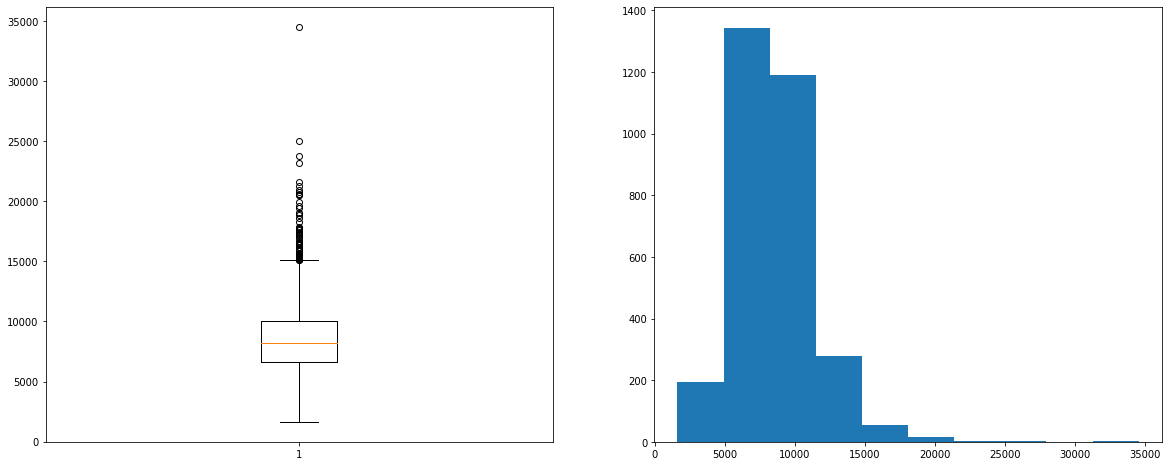

In [14]:
#Feature Engineering
#Outlier treatment-
fig, axis = plt.subplots(nrows = 1, ncols=2 ,figsize=(20,8))
axis[0].boxplot(df2["Premature death raw value"])
axis[1].hist(df2["Premature death raw value"])
plt.show()

In [15]:
#Keep values that are between 5% and 95% percentile values of Premature death column

Q1 = df2["Premature death raw value"].quantile(0.05)
Q95 = df2["Premature death raw value"].quantile(0.95)

df3 = df2[~((df2["Premature death raw value"] < (Q1)) |(df2["Premature death raw value"] > (Q95)))]

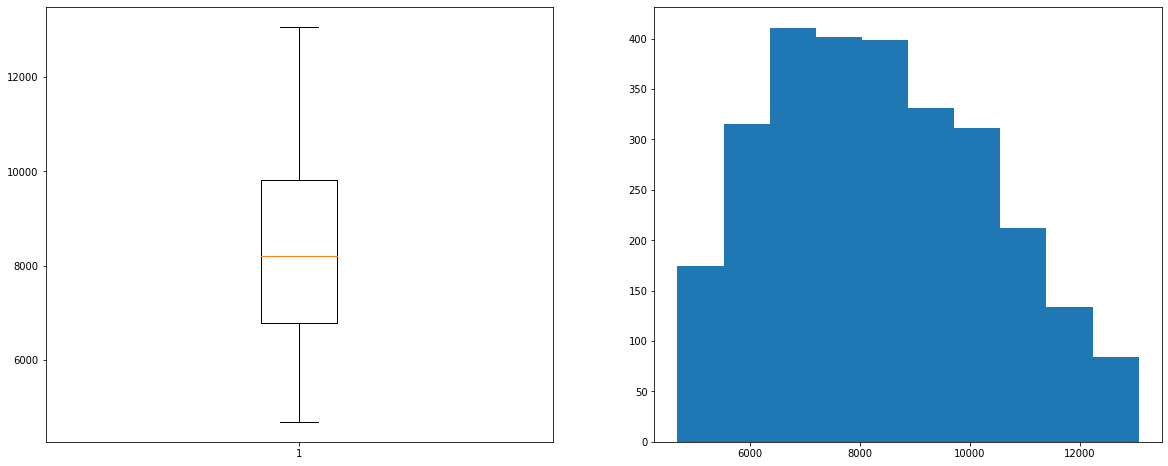

In [16]:
fig, axis = plt.subplots(nrows = 1, ncols=2 ,figsize=(20,8))
axis[0].boxplot(df3["Premature death raw value"])
axis[1].hist(df3["Premature death raw value"])
plt.show()

In [17]:
#check number of rows after filtering
print("Number of rows: ", df3.shape[0])
print("Number of columns: ", df3.shape[1])

Number of rows:  2773
Number of columns:  74


In [18]:
#Null value imputation and normalization of features
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

imputer = SimpleImputer(strategy ='median')
minmaxscaler = MinMaxScaler()

my_pipeline = Pipeline([
    ('imputer', imputer),
    ('min_max_scale', minmaxscaler)
])
df4 = pd.DataFrame(my_pipeline.fit_transform(df3[num_cols]), columns = num_cols)
df4.head()

,Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Low birthweight raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Access to exercise opportunities raw value,...,% 65 and older raw value,% Non-Hispanic Black raw value,% American Indian & Alaska Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% Hispanic raw value,% Non-Hispanic White raw value,% not proficient in English raw value,% Females raw value,% Rural raw value
0,0.375351,0.339233,0.431629,0.518906,0.289080,0.467684,0.475949,0.655172,0.491003,0.691301,...,0.208457,0.249577,0.007072,0.027347,0.008086,0.024334,0.747116,0.023321,0.819633,0.420022
1,0.357523,0.233712,0.245378,0.497167,0.248140,0.420037,0.400000,0.781609,0.339332,0.737135,...,0.302332,0.107774,0.012807,0.024831,0.005373,0.042391,0.846295,0.020569,0.819687,0.422791
2,0.809984,0.651636,0.664632,0.715355,0.385989,0.677745,0.683544,0.517241,0.424165,0.531668,...,0.278198,0.601848,0.011078,0.010944,0.016407,0.040364,0.450108,0.054894,0.674404,0.677896
3,0.892932,0.464606,0.517361,0.630601,0.334945,0.587920,0.587342,0.758621,0.562982,0.162514,...,0.221522,0.264798,0.006767,0.004992,0.009043,0.022150,0.753816,0.009733,0.662990,0.683526
4,0.764623,0.406272,0.537490,0.653607,0.209374,0.583151,0.475949,0.793103,0.560411,0.156345,...,0.259622,0.018340,0.010158,0.007451,0.009025,0.093956,0.883746,0.046989,0.795191,0.899515


In [19]:
#Check number of null values
df4.isnull().sum()

Premature death raw value                0
Poor or fair health raw value            0
Poor physical health days raw value      0
Poor mental health days raw value        0
Low birthweight raw value                0
                                        ..
% Hispanic raw value                     0
% Non-Hispanic White raw value           0
% not proficient in English raw value    0
% Females raw value                      0
% Rural raw value                        0
Length: 71, dtype: int64

In [20]:
#final dataset
df3.reset_index(drop=True, inplace=True)
df4.reset_index(drop=True, inplace=True)
df5 = pd.concat((df3[non_num_cols], df4), axis=1)

In [21]:
df5.head()

,5-digit FIPS Code,State Abbreviation,Name,Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Low birthweight raw value,Adult smoking raw value,Adult obesity raw value,...,% 65 and older raw value,% Non-Hispanic Black raw value,% American Indian & Alaska Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% Hispanic raw value,% Non-Hispanic White raw value,% not proficient in English raw value,% Females raw value,% Rural raw value
0,1001,AL,Autauga County,0.375351,0.339233,0.431629,0.518906,0.289080,0.467684,0.475949,...,0.208457,0.249577,0.007072,0.027347,0.008086,0.024334,0.747116,0.023321,0.819633,0.420022
1,1003,AL,Baldwin County,0.357523,0.233712,0.245378,0.497167,0.248140,0.420037,0.400000,...,0.302332,0.107774,0.012807,0.024831,0.005373,0.042391,0.846295,0.020569,0.819687,0.422791
2,1005,AL,Barbour County,0.809984,0.651636,0.664632,0.715355,0.385989,0.677745,0.683544,...,0.278198,0.601848,0.011078,0.010944,0.016407,0.040364,0.450108,0.054894,0.674404,0.677896
3,1007,AL,Bibb County,0.892932,0.464606,0.517361,0.630601,0.334945,0.587920,0.587342,...,0.221522,0.264798,0.006767,0.004992,0.009043,0.022150,0.753816,0.009733,0.662990,0.683526
4,1009,AL,Blount County,0.764623,0.406272,0.537490,0.653607,0.209374,0.583151,0.475949,...,0.259622,0.018340,0.010158,0.007451,0.009025,0.093956,0.883746,0.046989,0.795191,0.899515


In [22]:
df5.describe()

,5-digit FIPS Code,Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Low birthweight raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,...,% 65 and older raw value,% Non-Hispanic Black raw value,% American Indian & Alaska Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% Hispanic raw value,% Non-Hispanic White raw value,% not proficient in English raw value,% Females raw value,% Rural raw value
count,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000,...,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000
mean,30419.468806,0.437873,0.348486,0.409111,0.477285,0.240742,0.525332,0.492937,0.748594,0.395413,...,0.279665,0.109974,0.029173,0.032730,0.010367,0.097221,0.778418,0.049440,0.766243,0.576412
std,15067.156143,0.234767,0.146176,0.152718,0.162264,0.085636,0.135022,0.139026,0.113112,0.142998,...,0.086174,0.165783,0.068440,0.050571,0.035004,0.148803,0.199054,0.081089,0.073721,0.305578
min,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18161.000000,0.251295,0.235160,0.298634,0.370641,0.183293,0.431112,0.402532,0.689655,0.295630,...,0.224239,0.009434,0.005619,0.011558,0.002723,0.019107,0.657445,0.009214,0.751871,0.331972
50%,29133.000000,0.420528,0.333414,0.410594,0.485006,0.230263,0.518994,0.498734,0.758621,0.385604,...,0.272983,0.030869,0.010449,0.017810,0.005129,0.040470,0.848261,0.021594,0.780238,0.584096
75%,45073.000000,0.613376,0.448467,0.509814,0.589110,0.281711,0.619652,0.584810,0.827586,0.491003,...,0.324612,0.132470,0.023220,0.033314,0.009557,0.099174,0.939774,0.053691,0.803748,0.828759
max,56043.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
#check number of rows after filtering
print("Number of rows: ", df5.shape[0])
print("Number of columns: ", df5.shape[1])

Number of rows:  2773
Number of columns:  74


In [24]:
#Clustering and classification

In [25]:
#Use k-means to identify clusters in the dataset
#https://realpython.com/k-means-clustering-python/

import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

scaled_features = df5[num_cols]
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

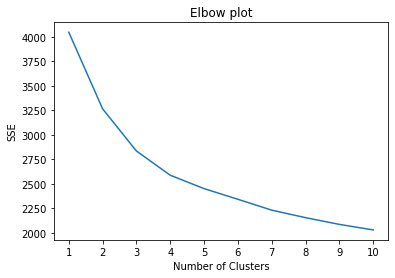

In [26]:
#PLot elbow curve - number of clusters vs SSE
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title('Elbow plot')
plt.show()

In [27]:
#from above elbow plot choose 4 as ideal clusters for the clustering
X = df5[num_cols].copy()
kmeans = KMeans(n_clusters=4, **kmeans_kwargs)
kmeans.fit(scaled_features)
X["clusters"] = kmeans.labels_
df5['clusters'] = X['clusters']
df5.head()

,5-digit FIPS Code,State Abbreviation,Name,Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Low birthweight raw value,Adult smoking raw value,Adult obesity raw value,...,% Non-Hispanic Black raw value,% American Indian & Alaska Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% Hispanic raw value,% Non-Hispanic White raw value,% not proficient in English raw value,% Females raw value,% Rural raw value,clusters
0,1001,AL,Autauga County,0.375351,0.339233,0.431629,0.518906,0.289080,0.467684,0.475949,...,0.249577,0.007072,0.027347,0.008086,0.024334,0.747116,0.023321,0.819633,0.420022,2
1,1003,AL,Baldwin County,0.357523,0.233712,0.245378,0.497167,0.248140,0.420037,0.400000,...,0.107774,0.012807,0.024831,0.005373,0.042391,0.846295,0.020569,0.819687,0.422791,2
2,1005,AL,Barbour County,0.809984,0.651636,0.664632,0.715355,0.385989,0.677745,0.683544,...,0.601848,0.011078,0.010944,0.016407,0.040364,0.450108,0.054894,0.674404,0.677896,0
3,1007,AL,Bibb County,0.892932,0.464606,0.517361,0.630601,0.334945,0.587920,0.587342,...,0.264798,0.006767,0.004992,0.009043,0.022150,0.753816,0.009733,0.662990,0.683526,0
4,1009,AL,Blount County,0.764623,0.406272,0.537490,0.653607,0.209374,0.583151,0.475949,...,0.018340,0.010158,0.007451,0.009025,0.093956,0.883746,0.046989,0.795191,0.899515,0


In [28]:
#Number of unique counties per clusters
pd.DataFrame(df5.groupby('clusters')['Name'].nunique()).rename(columns={'Name':'Number of counties'})

,Number of counties
clusters,
0,557
1,503
2,675
3,383


In [29]:
#Check correlation of features by creating correlation matrix
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

,Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Low birthweight raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Access to exercise opportunities raw value,Excessive drinking raw value,Alcohol-impaired driving deaths raw value,Sexually transmitted infections raw value,Teen births raw value,Uninsured raw value,Primary care physicians raw value,Dentists raw value,Mental health providers raw value,Preventable hospital stays raw value,Mammography screening raw value,Flu vaccinations raw value,High school completion raw value,Some college raw value,Unemployment raw value,Children in poverty raw value,Income inequality raw value,Children in single-parent households raw value,Social associations raw value,Violent crime raw value,Injury deaths raw value,Air pollution - particulate matter raw value,Drinking water violations raw value,Severe housing problems raw value,Driving alone to work raw value,Long commute - driving alone raw value,Life expectancy raw value,Premature age-adjusted mortality raw value,Frequent physical distress raw value,Frequent mental distress raw value,Diabetes prevalence raw value,HIV prevalence raw value,Food insecurity raw value,Limited access to healthy foods raw value,Motor vehicle crash deaths raw value,Insufficient sleep raw value,Uninsured adults raw value,Uninsured children raw value,Other primary care providers raw value,High school graduation raw value,Reading scores raw value,Math scores raw value,Median household income raw value,Children eligible for free or reduced price lunch raw value,Residential segregation - non-White/White raw value,Suicides raw value,Traffic volume raw value,Homeownership raw value,Severe housing cost burden raw value,Broadband access raw value,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% Non-Hispanic Black raw value,% American Indian & Alaska Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% Hispanic raw value,% Non-Hispanic White raw value,% not proficient in English raw value,% Females raw value,% Rural raw value,clusters
Premature death raw value,1.000000,0.647075,0.659603,0.642251,0.545296,0.632814,0.353314,-0.524039,0.548503,-0.353888,-0.556797,-0.079766,0.253558,0.614291,0.279856,-0.237145,-0.247623,-0.129011,0.371553,-0.347294,-0.226156,-0.449158,-0.505156,0.296296,0.660104,0.389356,0.478537,-0.031544,0.254349,0.556305,0.252418,-0.049780,0.034666,0.245751,0.124417,-0.884478,0.935698,0.678876,0.691152,0.515030,0.170101,0.677969,0.108292,0.516599,0.552611,0.302754,0.081991,-0.014021,-0.040092,-0.288592,-0.300257,-0.621574,0.569295,0.003753,0.206787,-0.216268,-0.023707,0.037580,-0.566608,-0.160063,-0.027322,0.123793,0.350735,0.092996,-0.281383,-0.073969,-0.100725,-0.152801,-0.169527,0.094649,0.237393,-0.168732
Poor or fair health raw value,0.647075,1.000000,0.900090,0.752329,0.550030,0.650118,0.317039,-0.641772,0.504887,-0.391204,-0.705941,-0.155145,0.312380,0.760193,0.495769,-0.344741,-0.313706,-0.185375,0.434182,-0.513865,-0.301122,-0.844857,-0.753250,0.430692,0.809460,0.489806,0.563682,-0.255646,0.246436,0.206225,0.332285,0.003908,0.255540,0.179380,0.130549,-0.613035,0.712345,0.941130,0.817536,0.465627,0.252595,0.818119,0.145602,0.461354,0.680955,0.535882,0.229849,-0.116095,-0.016470,-0.452742,-0.400254,-0.693869,0.746388,-0.061865,0.007355,-0.147265,-0.158192,0.149076,-0.683262,-0.072297,0.102128,-0.105452,0.398370,0.044297,-0.196474,-0.031182,0.304945,-0.479767,0.276940,-0.097927,0.154637,-0.161791
Poor physical health days raw value,0.659603,0.900090,1.000000,0.903147,0.456989,0.756960,0.302778,-0.573134,0.509709,-0.357393,-0.677207,-0.109750,0.174163,0.645510,0.298396,-0.322093,-0.278028,-0.113219,0.383197,-0.450141,-0.254760,-0.665141,-0.696985,0.479569,0.723714,0.422489,0.453162,-0.279929,0.195054,0.311587,0.346910,-0.004102,0.201152,0.1829

In [30]:
all_data = df5[num_cols]
features = all_data.iloc[:,5:]
output = all_data.iloc[:,1]

In [31]:
#Choosing the health behaviour features for supervised learning modelling
all_data = df5[num_cols]

#Output variable is premature death raw value
output = all_data.iloc[:,1]

#Infut features
features =all_data.loc[:,['Adult smoking raw value', 
'Adult obesity raw value',
'Food environment index raw value', 
'Physical inactivity raw value',
'Access to exercise opportunities raw value',
'Excessive drinking raw value',
'Teen births raw value',
'Alcohol-impaired driving deaths raw value',
'Sexually transmitted infections raw value',
'Food insecurity raw value',
'Insufficient sleep raw value']]

In [32]:
#Split the dataset into train and validation datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X_train, X_valid, y_train, y_valid = train_test_split(features, output, train_size=0.8, test_size=0.2,
                                                                random_state=0)

In [33]:
#Linear regression model
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()

model_linear.fit(X_train, y_train)
preds = model_linear.predict(X_valid)
mae = mean_absolute_error(y_valid, preds)
mse = mean_squared_error(y_valid, preds)
r2 = r2_score(y_valid, preds)

print('MAE:', mae)
print('MSE:', mse)
print('r_squared: ', r2)

MAE: 0.040837260231767064
MSE: 0.0031317437485049522
r_squared:  0.8532965830072794


In [34]:
#As training and test error metrics are similar the model is not overfitting
preds = model_linear.predict(X_train)
mae = mean_absolute_error(y_train, preds)
mse = mean_squared_error(y_train, preds)
r2 = r2_score(y_train, preds)

print('MAE:', mae)
print('MSE:', mse)
print('r_squared: ', r2)

MAE: 0.04443553978645292
MSE: 0.0035565988349192234
r_squared:  0.8334594875180774


In [35]:
#Decision tree 
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor(max_depth=5, random_state = 0)

model_dt.fit(X_train, y_train)
preds = model_dt.predict(X_valid)
score = mean_absolute_error(y_valid, preds)
mae = mean_absolute_error(y_valid, preds)
mse = mean_squared_error(y_valid, preds)
r2 = r2_score(y_valid, preds)

print('MAE:', mae)
print('MSE:', mse)
print('r_squared: ', r2)

MAE: 0.04910667727085997
MSE: 0.004092593946339567
r_squared:  0.8082865124011637


In [36]:
#Out of the models used to predict Premature death, linear regression model works best as the Mean absolute error, mean squared error is the least of the two
#Also r squared is higher for linear regression model

In [37]:
#The five most important factors predicting premature death are

#Get the top 5 co-efficeints of the features
coeffs = pd.DataFrame({'columns': list(features.columns), 'co-eff': model_linear.coef_})
coeffs.sort_values(['co-eff'], ascending = False).head(5)

,columns,co-eff
6,Teen births raw value,0.322189
9,Food insecurity raw value,0.305737
10,Insufficient sleep raw value,0.171835
0,Adult smoking raw value,0.131758
8,Sexually transmitted infections raw value,0.036424


In [38]:
#Get the bottom 5 co-efficeints of the features
coeffs.sort_values(['co-eff'], ascending = True).head(5)

,columns,co-eff
5,Excessive drinking raw value,-0.160730
4,Access to exercise opportunities raw value,-0.047741
2,Food environment index raw value,-0.047721
3,Physical inactivity raw value,-0.041655
1,Adult obesity raw value,-0.027407


In [39]:
#The five most important factors predicting premature death are:
df = pd.concat(((coeffs.sort_values(['co-eff'], ascending = False).head(4)['columns']),(coeffs.sort_values(['co-eff'], ascending = True).head(1)['columns'])),axis=0)

print("The five most important factors predicting premature death are:")
print(df)
print()
print()

print('The top factors that positively impact premature death are: ')
print((coeffs.sort_values(['co-eff'], ascending = False).head(4)['columns']))
print()

print('The top factors that negatively impact premature death are: ')
print((coeffs.sort_values(['co-eff'], ascending = True).head(1)['columns']))
print()

The five most important factors predicting premature death are:
6            Teen births raw value
9        Food insecurity raw value
10    Insufficient sleep raw value
0          Adult smoking raw value
5     Excessive drinking raw value
Name: columns, dtype: object


The top factors that positively impact premature death are: 
6            Teen births raw value
9        Food insecurity raw value
10    Insufficient sleep raw value
0          Adult smoking raw value
Name: columns, dtype: object

The top factors that negatively impact premature death are: 
5    Excessive drinking raw value
Name: columns, dtype: object



In [40]:
#Q4:#Out of the two models used to predict Premature death, 
#linear regression model works best as the Mean absolute error and mean squared error is the least of the two

In [41]:
#Recommendation for Allengheny county

In [42]:
alleghany = df5[df5['Name']=='Allegheny County']
alleghany[list(df)]

,Teen births raw value,Food insecurity raw value,Insufficient sleep raw value,Adult smoking raw value,Excessive drinking raw value
1982,0.122432,0.27668,0.502166,0.418973,0.62999


In [43]:
#Baseline metrics - median values for the entire population
features[list(df)].median()

Teen births raw value           0.300210
Food insecurity raw value       0.375494
Insufficient sleep raw value    0.445176
Adult smoking raw value         0.518994
Excessive drinking raw value    0.505186
dtype: float64

In [44]:
#Recommendations to alleghany county
#Insufficient sleep raw value is higher than median of all counties. Hence, care must be taken to decrease this index
#All other features are under baseline thresholds.